In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv('../docs 2nd Approach/z-score_all_voltage.csv')
df = df.apply(lambda x: x.sort_values().values)
df

,0.5v,3v,6v,9v,12v,15v,18v,21v,24.5v
0,-5.498897,-5.415299,-4.764770,-3.828409,-4.526218,-7.134424,-4.232667,-3.128839,-3.797127
1,-5.498897,-5.415299,-4.764770,-3.828409,-4.526218,-6.017926,-3.143037,-3.128839,-3.797127
2,-5.498897,-5.415299,-3.580976,-3.828409,-4.526218,-4.343178,-3.143037,-3.128839,-3.797127
3,-4.217401,-3.530187,-3.580976,-3.828409,-3.395229,-4.343178,-3.143037,-3.128839,-3.797127
4,-3.363071,-3.530187,-3.580976,-3.828409,-3.395229,-3.226680,-3.143037,-3.128839,-2.670717
...,...,...,...,...,...,...,...,...,...
995,3.044406,2.125150,2.337993,3.718972,2.259716,2.355811,2.305112,1.897408,2.961331
996,3.044406,2.125150,3.521786,3.718972,2.259716,2.355811,2.305112,1.897408,2.961331
997,3.044406,2.125150,3.521786,3.718972,3.390705,2.355811,2.305112,3.405282,2.961331
998,3.044406,2.125150,3.521786,3.718972,3.390705,3.472310,2.305112,3.405282,2.961331


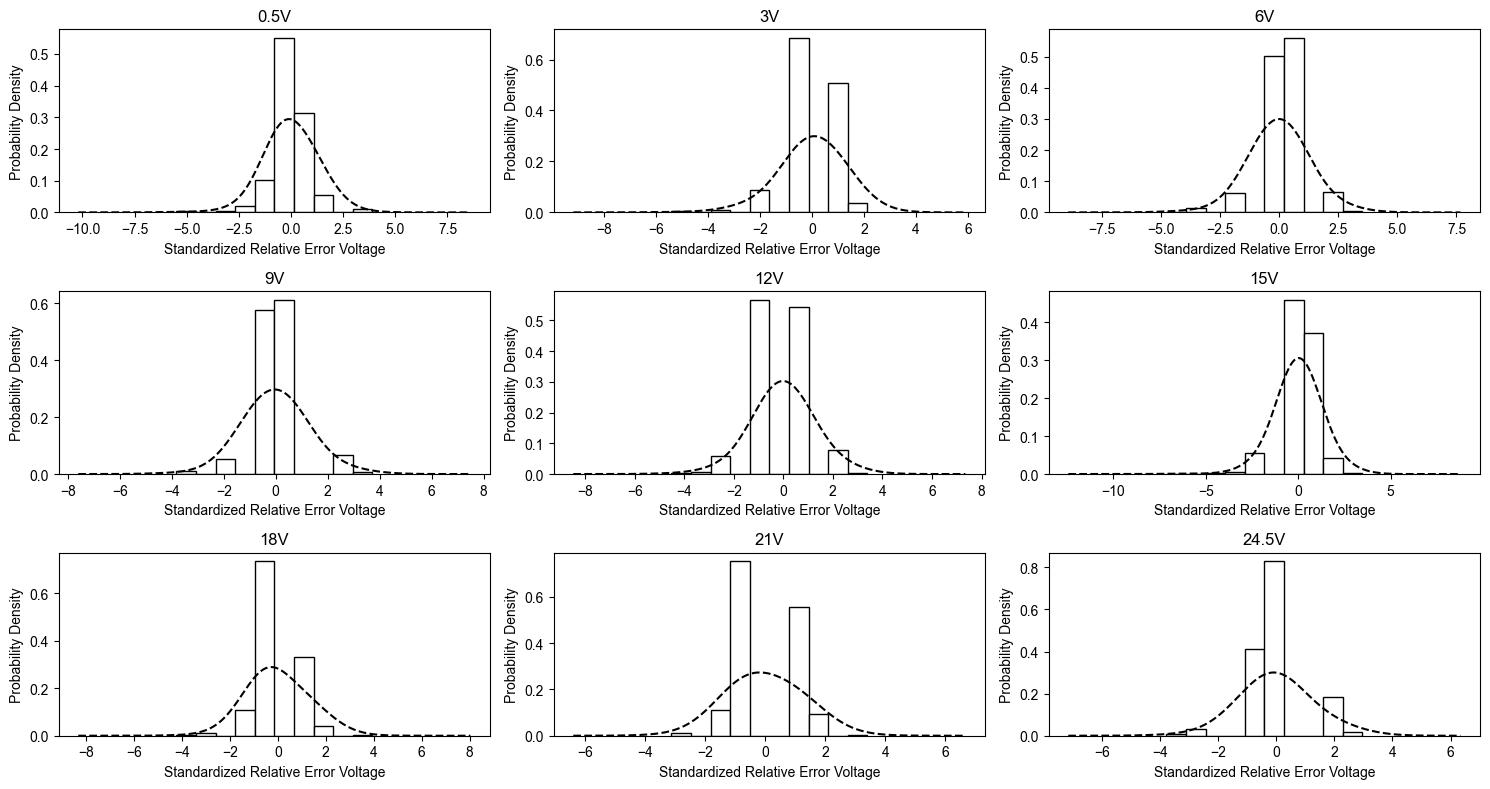

In [6]:
fig, axs = plt.subplots(3, 3)
sns.set_style("darkgrid", {'axes.grid' : False})
fig.set_figheight(8)
fig.set_figwidth(15)
axs[0, 0].hist(df['0.5v'], density=True, edgecolor='k', color='w')
axs[0, 0].set_title('0.5V')
df['0.5v'].plot.kde(ax=axs[0,0], bw_method=1, color='k', linestyle='--')

axs[0, 1].hist(df['3v'], density=True, edgecolor='k', color='w')
axs[0, 1].set_title('3V')
df['3v'].plot.kde(ax=axs[0,1], bw_method=1, color='k', linestyle='--')

axs[0, 2].hist(df['6v'], density=True, edgecolor='k', color='w')
axs[0, 2].set_title('6V')
df['6v'].plot.kde(ax=axs[0,2], bw_method=1, color='k', linestyle='--')

axs[1, 0].hist(df['9v'], density=True, edgecolor='k', color='w')
axs[1, 0].set_title('9V')
df['9v'].plot.kde(ax=axs[1,0], bw_method=1, color='k', linestyle='--')

df['12v'].plot.kde(ax=axs[1,1], bw_method=1, color='k', linestyle='--')
axs[1, 1].set_title('12V')
axs[1, 1].hist(df['12v'], density=True, edgecolor='k', color='w')

df['15v'].plot.kde(ax=axs[1,2], bw_method=1, color='k', linestyle='--')
axs[1, 2].set_title('15V')
axs[1, 2].hist(df['15v'], density=True, edgecolor='k', color='w')

df['18v'].plot.kde(ax=axs[2,0], bw_method=1, color='k', linestyle='--')
axs[2, 0].hist(df['18v'], density=True, edgecolor='k', color='w')
axs[2, 0].set_title('18V')

df['21v'].plot.kde(ax=axs[2,1], bw_method=1, color='k', linestyle='--')
axs[2, 1].hist(df['21v'], density=True, edgecolor='k', color='w')
axs[2, 1].set_title('21V')

df['24.5v'].plot.kde(ax=axs[2,2], bw_method=1, color='k', linestyle='--')
axs[2, 2].hist(df['24.5v'], density=True, edgecolor='k', color='w')
axs[2, 2].set_title('24.5V')

for ax in axs.flat:
    ax.set(xlabel='Standardized Relative Error Voltage', ylabel='Probability Density')

plt.tight_layout()
plt.savefig('../docs 2nd Approach/img/distribution_normal.png')

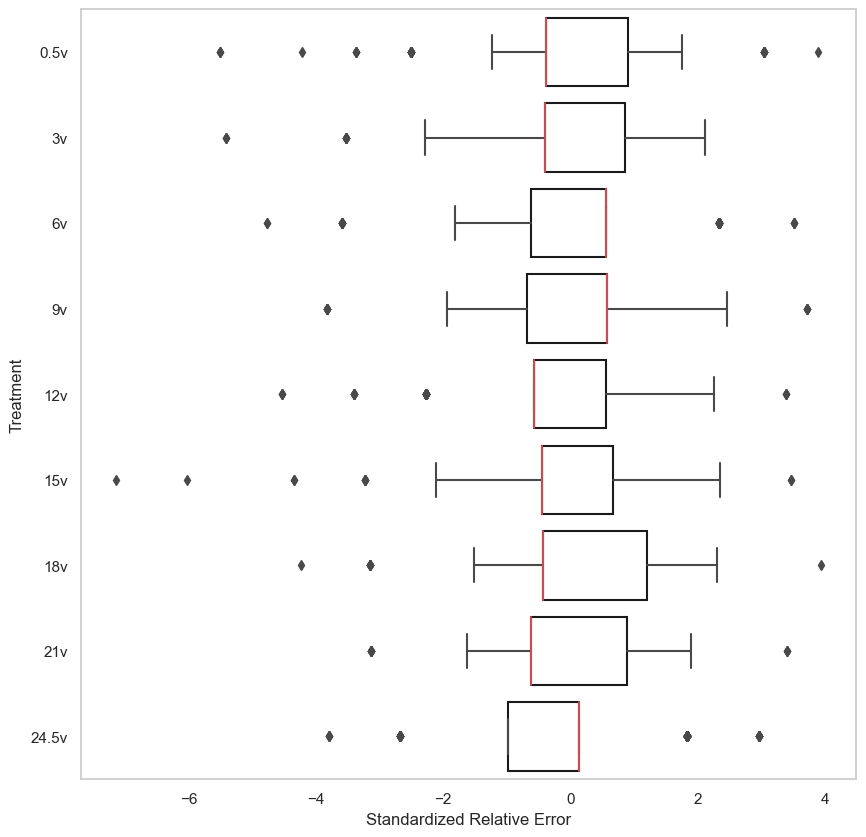

In [7]:
list_voltage = []
for i in df.columns:
    list_voltage.append(str(i))


df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=list_voltage)
# replace column names
df_melt.columns = ['index', 'voltage', 'value']
df_melt

sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid', {'axes.grid' : False})
ax = sns.boxplot(
    x='value', 
    y='voltage', 
    data=df_melt, 
    boxprops = {"edgecolor":'k', 'facecolor':'w'},
    medianprops={"color": "r"},)
ax.set(xlabel='Standardized Relative Error', ylabel='Treatment')
plt.savefig('../docs 2nd Approach/img/Boxplot Remove Outlier STD Based from each variation sample.png')
plt.show()